# **# Home Exam 52002 Section 1: Networks (45 points)**
### **General Instructions:**
* **Fill your ID Here:** [314992595]
* Work on the assignment and submit your solution **individually**. <br>
No sharing of information on the assignment is allowed between student.


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For most questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For others, you will need to run commands in other environments (e.g. unix) - in this case, just copy the commands and the relevant outputs in the designated text blocks.
* Submit your filled solution by February 25th 23:59 your solution on moodle.


* **Grading:** There are overall three sections, with a few questions in each sections. The number of points is shown for each question. The total number of points of all sections is *105*.
* **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output. Make sure to run the .ipynb notebook and save it before submitting.
* **Note:** Some parts of the code may take up to several hours to run.Be patient. However, don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.
* **Good luck!**


## **Degrees, Communities, Clustering Coefficient, Random Networks** <br>

## **Qu1: Clustering Coefficient [6 points]**

Extract the eight facebook network files `*_edges.csv` from the file `gemsec_facebook_dataset.tar.gz` available in moodle and load them to the python notebook.  <br>
These **undirected** network describe *mutual likes* between facebook pages, where each node corresponds to a page, and each edge corresponds to a joint like between the two pages. Each network describes connections between pages of different fields (artists, athletes, company, goverment, new_cites, politicians, public_figures and tv_shows). <br>
For each network, compute and report the number of nodes, number of edges, number of triangles and the global clustering coefficient of the network. Display your results for all networks in a table. <br>
The global clustering coefficient is defined [here](https://en.wikipedia.org/wiki/Clustering_coefficient), as 3 times the number of triangles, divided by the number of triplets, where a triplet is defined as a set of two edges ${(x,y),(x,z)}$ centered at a joint vertex $x$. Alternatively, a formula for the global clustering coefficient in terms of the adjacency matrix $E$ and the degrees vector $d$ is:
$$
\frac{\sum_{i,j,k=1}^n e_{ij} e_{ik} e_{jk}}{\sum_{i=1}^n d_i(d_i-1)}
$$


## **Qu2: Degree Distribution [9 points]**
For each network, compute the degree of every node, and list the IDs of the five nodes (webpages) with the highest degree along with their degrees (again, use a table to show the top nodes for all networks) <br>
Next, compute and plot on a log-log scale the `degree distribution` of the graph, i.e. the relative frequency $f_k$ (out of $n$ nodes) of nodes having degree $k$ for every $k$ from $0$ to the maximal degree. Use one plot with different colors/symbols for the eight different networks.

Next, for each network, fit estimate the power $\alpha$ of the power law distribution $P(k) \propto k^{\alpha}$ to the degree distribution, by doing a linear regression of the log of the frequency $log(f_k)$ vs. the log of the degree $log(k)$. Remove the top and bottom $5\%$ of the degrees before fitting, to allow a better fit to the bulk of the distribution, and not the outliers (very high/low degrees).
Report the estimated powers in a table, and plot again the degree distribution along with the fitted lines on a log-log scale for each network separately.

## **Qu3: Random Graphs [7 points]**
For each of the eight networks simulate a random graph using the `Erdos-Renyi` model with the same number of nodes $n$ as the real network, and with edge probability $p$ chosen such that the `expected` number of overall edges in the simulated random graph is equal to the number of edges in the real network.
Compute and plot the degree distributions for the eight random graphs, together with the fitted power law exponents $\alpha$, in similar to (b.). <br>
Is the `Erdos-Renyi` model a good generative model for these graphs, based on the degree distribution? does it seem to give a power-law degree distribution?



## **Qu4: Unite Networks [7 points]**
Next, use **unix commands** to unite the eight different networks into one big network, such that the vertex set of the combined network is the union of the eight vertex sets, and similarly the edges set of the combined network is the union of the eight edge sets.
Give different numeric labels to the nodes of different networks such that each numeric label will correspond to a unique node in the combined network (for example, if one network has 4 nodes and the next one has 3 nodes, then you can name the nodes of the first network as 0,1,2,3, and the nodes of the second network as 4,5,6).

Next, let $m$ be the total number of edges in the combined network. Add $0.1m$ new random edges, where each edge is between two random nodes $i,j$ chosen uniformly from the $n$ nodes of the unified network (i.e. in similar to an `Erdos-Renyi` graph $G(n,p)$ with $p = \frac{0.1 m}{n(n-1)/2}$). Use **unix** commands to create and add the random edges (you may use the '$RANDOM' unix command).

Thus, the new random edges will connect between the eight different communites representing pages from different domains.
Report the number of nodes and edges of the unified network.

## **Qu5: Community Detection [9 points]**  

We define the `ground-truth communities` of this unified network as the eight different parts that were united into a single graph. Compute and report the `modularity` of the network division into these eight communities.

Next, run the `asyn_lpa_communities` algorithm available in `networkx` for finding the community structure for the combined graph, implemented in the `networkx.algorithms.community` python module. Report the number of communities found, and the `modularity` of the resulting partition. <br>

Finally, compare the division to communities found by the algorithm to the ground truth division into eight communities. Report the [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index#:~:text=The%20adjusted%20Rand%20index%20is,specified%20by%20a%20random%20model.). <br>

**Note:** we expect the algorithm to return a number (much) larger than eight, the number of communities in the 'ground-truth', because in each sub-network there may also be a community structure of its own. Nevertheless, the ARI will measure the agreement, and yield high values if each of the small communities returned by the algorithm lies exclusively in only one of the eight 'true' communities.

**Explanation:** ARI is an index that measures how well two partitions of the same set (e.g. two clustering results) agree with each other. For example ARI is equal to $1$ when the two partitions completely agree with each other, and is equal to approximately $0$ for two random partitions. A python implementation of ARI is available in `scikit-learn`.


## **Qu6: Random Graphs2 [7 points]**
Draw $100$ random networks with the same `degree distribution` as the real combined network, but with edges between pairs of nodes drawn randomly, using the function `sample_random_graph_with_degree_seq` supplied to you, with at least $100,000$ iteration per random network.
Start the randomization of each random network from the preious one.
This implementation approximates sampling a graph from the
[configuration model](https://en.wikipedia.org/wiki/Configuration_model) that is implemented in `networkx`, but is too slow and memory-consuming for our purposes. <br>
Compute the global clustering coefficient for each random network, and plot the empirical distribution of the $100$ clustering coefficients. How do they compare to the clustering coefficient of the real unified network? explain.
Is the configuration model a good generative model for the network based on the clustering coefficient? <br>



Write the commands that you use in the designated **code** blocks below. <br>
The output should be generated automatically when running the .ipynb notebook (e.g. in `google colab`), including tables, figures etc. <br>
You may include additional text blocks with explanations and clarifications.



In [4]:
# Solutions:
# Qu1:
import os
import tarfile
from pathlib import Path

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

DATA_TAR = Path("../gemsec_facebook_dataset.tar.gz")
DATA_DIR = Path("../facebook_clean_data")

if DATA_TAR.exists() and not DATA_DIR.exists():
    with tarfile.open(DATA_TAR, "r:gz") as tf:
        tf.extractall("..")

edge_files = sorted(DATA_DIR.glob("*_edges.csv"))

networks = {}
for path in edge_files:
    name = path.stem.replace("_edges", "")
    df = pd.read_csv(path)
    G = nx.from_pandas_edgelist(df, "node_1", "node_2", create_using=nx.Graph())
    max_id = int(df[["node_1", "node_2"]].to_numpy().max())
    G.add_nodes_from(range(max_id + 1))  # include potential isolated nodes
    networks[name] = G

# Code to output the number of nodes, edges, triangles and clustering coefficient and display them in a table here:

stats_rows = []
for name, G in networks.items():
    n = G.number_of_nodes()
    m = G.number_of_edges()
    triangles = sum(nx.triangles(G).values()) // 3
    global_c = nx.transitivity(G)  # global clustering coefficient
    stats_rows.append(
        {
            "network": name,
            "nodes": n,
            "edges": m,
            "triangles": triangles,
            "global_clustering": global_c,
        }
    )

stats_df = pd.DataFrame(stats_rows).sort_values("network")
stats_df

,network,nodes,edges,triangles,global_clustering
0,artist,50515,819306,2273700,0.053497
1,athletes,13866,86858,140023,0.129227
2,company,14113,52310,56005,0.153199
3,government,7057,89455,523854,0.223769
4,new_sites,27917,206259,387444,0.113985
5,politician,5908,41729,174632,0.301074
6,public_figure,11565,67114,184838,0.166564
7,tvshow,3892,17262,87090,0.590644


**Qu1 – Explanation**

We load each `*_edges.csv` file as an **undirected** graph where each row is an edge between two Facebook pages (`node_1`, `node_2`).

**Node count:** Node IDs are numeric and range from `0` to `max_id`. Some nodes may be isolated (degree 0) and therefore do not appear in any edge row. Since `networkx.from_pandas_edgelist` only creates nodes for IDs that appear in at least one edge, we explicitly add all IDs in `range(max_id + 1)` after loading to ensure isolated nodes are counted correctly.

**Global clustering coefficient:** We use `nx.transitivity(G)`, which implements the standard formula from the assignment:

$$
C = \frac{\sum_{i,j,k=1}^{n} e_{ij}\,e_{ik}\,e_{jk}}{\sum_{i=1}^{n} d_i(d_i-1)} = \frac{6T}{\sum_{i=1}^{n} d_i(d_i-1)}
$$

where $T$ is the number of triangles. The numerator equals $6T$ because each triangle has $3! = 6$ ordered vertex permutations.

**Observations from the table:**

| Observation | Detail |
|-------------|--------|
| Largest network | `artist` — 50,515 nodes, 819,306 edges |
| Smallest network | `tvshow` — 3,892 nodes, 17,262 edges |
| Highest clustering | `tvshow` at **0.5906** — nearly 60% of all possible triangles are closed |
| Lowest clustering | `artist` at **0.0535** — a large, sparse network with few closed triangles relative to its size |
| Most triangles | `artist` (2,273,700), driven by its large size |
| Densest clustering | `politician` (0.3011) and `government` (0.2238), reflecting the tightly connected nature of political page networks |

The high clustering in `tvshow` and `politician` networks suggests strong community cohesion — pages in these categories tend to form tightly-knit cliques. The `artist` network, despite having by far the most edges, has the lowest clustering coefficient, indicating that its connections are spread broadly rather than forming local triangles.

Top 5 nodes by degree for each network:


,network,rank,node_id,degree
0,artist,1,7675,1469
1,artist,2,41998,1462
2,artist,3,48099,1352
3,artist,4,9187,1328
4,artist,5,37078,1297
5,athletes,1,6221,468
6,athletes,2,5328,402
7,athletes,3,3108,308
8,athletes,4,11976,292
9,athletes,5,11134,268


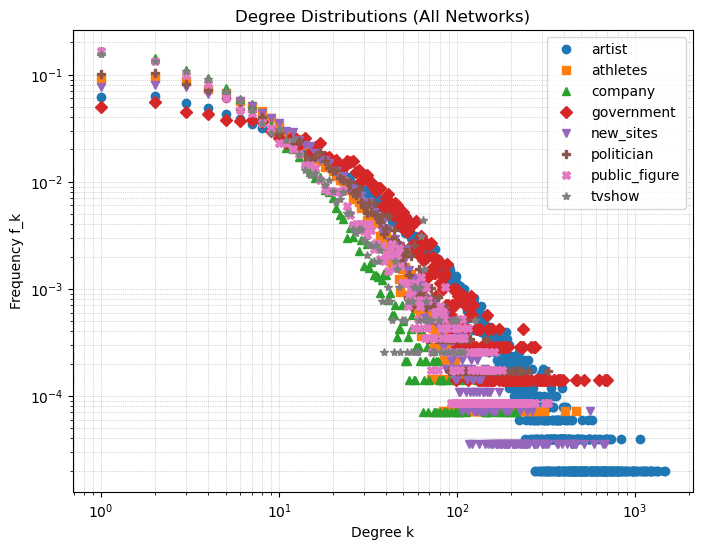


Estimated power-law exponents:


,network,alpha,intercept
0,artist,-1.245722,-0.893703
1,athletes,-1.161387,-1.094588
2,company,-1.289028,-0.876164
3,government,-1.068074,-1.315616
4,new_sites,-1.160026,-1.102361
5,politician,-1.169353,-1.100932
6,public_figure,-1.427704,-0.676123
7,tvshow,-1.345124,-0.802757


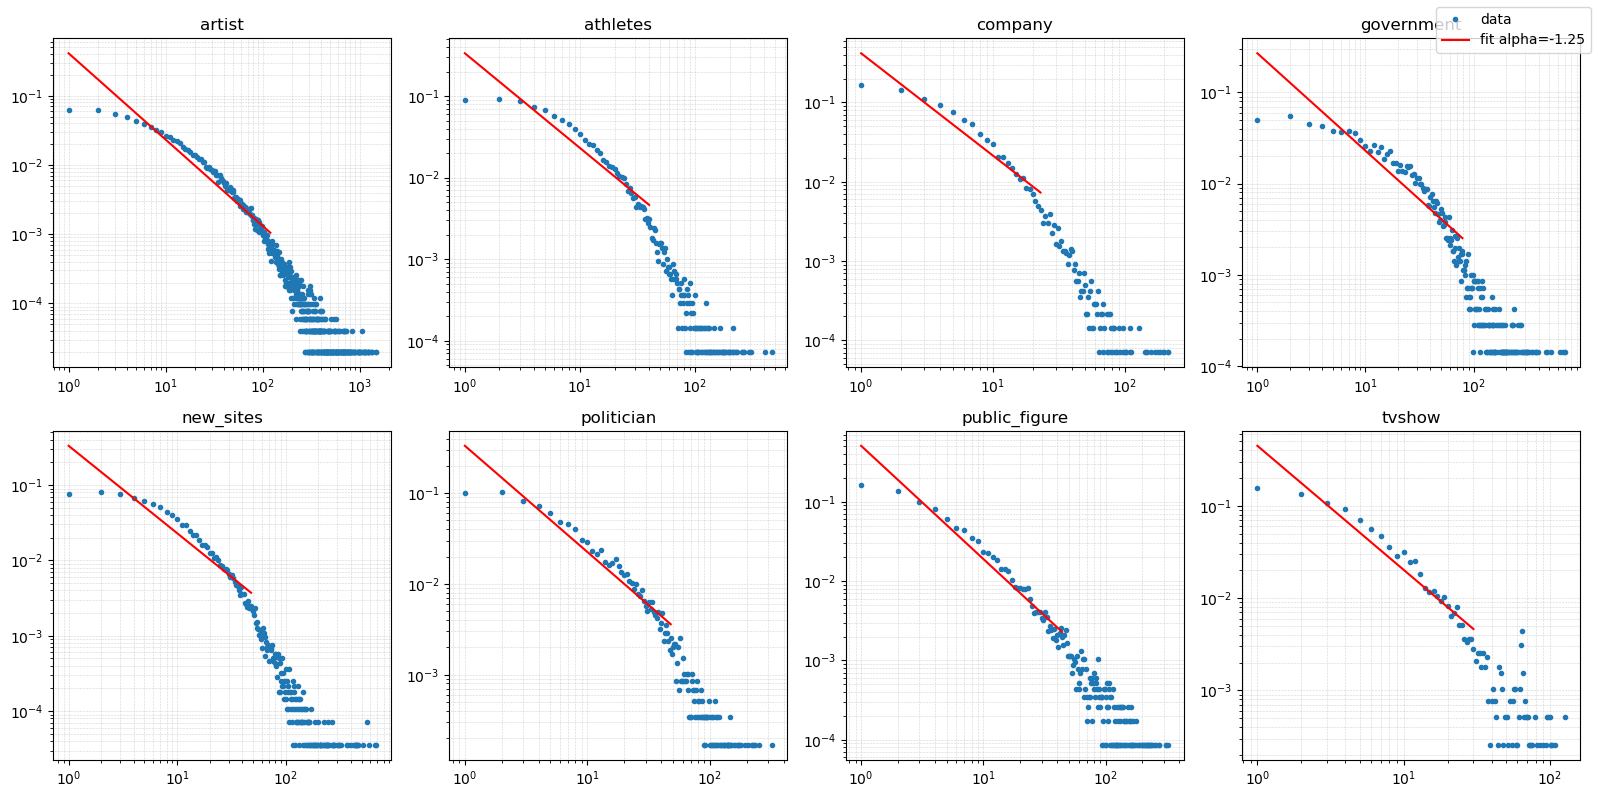

In [5]:
# Qu2: Code for Computing and plotting the degree distribution, and for printing the top highest degree nodes for each network:

def degree_distribution(G: nx.Graph):
    degrees = np.array([d for _, d in G.degree()])
    counts = np.bincount(degrees)
    k = np.nonzero(counts)[0]
    freq = counts[k] / len(degrees)
    return degrees, k, freq


def fit_powerlaw(degrees, k, freq):
    low, high = np.percentile(degrees, [5, 95])
    mask = (k >= low) & (k <= high) & (k > 0) & (freq > 0)
    k_fit = k[mask]
    f_fit = freq[mask]
    if len(k_fit) < 2:
        return np.nan, np.nan, k_fit, f_fit
    slope, intercept = np.polyfit(np.log(k_fit), np.log(f_fit), 1)
    return slope, intercept, k_fit, f_fit

# Top-5 highest degree nodes per network
rows = []
for name, G in networks.items():
    top5 = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
    for rank, (node, deg) in enumerate(top5, start=1):
        rows.append({"network": name, "rank": rank, "node_id": node, "degree": deg})

top5_df = pd.DataFrame(rows).sort_values(["network", "degree"], ascending=[True, False]).reset_index(drop=True)
print("Top 5 nodes by degree for each network:")
display(top5_df)

# Plot degree distributions for all networks on one log-log plot
plt.figure(figsize=(8, 6))
markers = ["o", "s", "^", "D", "v", "P", "X", "*"]
for (name, G), marker in zip(networks.items(), markers):
    degrees, k, freq = degree_distribution(G)
    plt.loglog(k, freq, marker=marker, linestyle="", label=name)

plt.xlabel("Degree k")
plt.ylabel("Frequency f_k")
plt.title("Degree Distributions (All Networks)")
plt.legend()
plt.grid(True, which="both", linestyle=":", linewidth=0.5)
plt.show()

# Code for fitting a power-law exponent to each degree distribution, and displaying the fitted parameters:
fit_rows = []
fit_store = {}
for name, G in networks.items():
    degrees, k, freq = degree_distribution(G)
    alpha, intercept, k_fit, f_fit = fit_powerlaw(degrees, k, freq)
    fit_rows.append({"network": name, "alpha": alpha, "intercept": intercept})
    fit_store[name] = (k, freq, alpha, intercept, k_fit)

print("\nEstimated power-law exponents:")
display(pd.DataFrame(fit_rows).sort_values("network").reset_index(drop=True))

# Plot distributions with fitted power-law lines (per network)
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=False, sharey=False)
axes = axes.ravel()
for ax, (name, G) in zip(axes, networks.items()):
    k, freq, alpha, intercept, k_fit = fit_store[name]
    ax.loglog(k, freq, "o", markersize=3, label="data")
    if np.isfinite(alpha):
        k_line = np.linspace(k_fit.min(), k_fit.max(), 80)
        f_line = np.exp(intercept) * (k_line ** alpha)
        ax.loglog(k_line, f_line, "r-", label=f"fit alpha={alpha:.2f}")
    ax.set_title(name)
    ax.grid(True, which="both", linestyle=":", linewidth=0.4)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.tight_layout()
plt.show()

## Qu2 – Explanation

  Top-5 hub nodes: The five highest-degree nodes in each network represent the most influential Facebook pages — pages whose mutual likes overlap with the largest
   number of others. Hub nodes have an outsized effect on network properties like information diffusion and diameter.

  Degree distribution on a log–log scale: A log–log plot linearizes power-law behavior: if $f_k \propto k^{\alpha}$, the distribution appears as a straight line
  with slope $\alpha$. All eight Facebook networks display an approximately linear decay with a long tail toward high degrees — the signature of a heavy-tailed,
  scale-free-like distribution typical of real social networks.

  Power-law exponent fitting: We trim the bottom and top 5% of node degrees before fitting to avoid distortion from very low-degree noise and extreme hub
  outliers. The fitted $\alpha$ is negative for all networks, confirming the decaying power-law shape. A steeper (more negative) $\alpha$ indicates a
  faster-decaying tail; a shallower $\alpha$ indicates a heavier tail with more pronounced hubs.


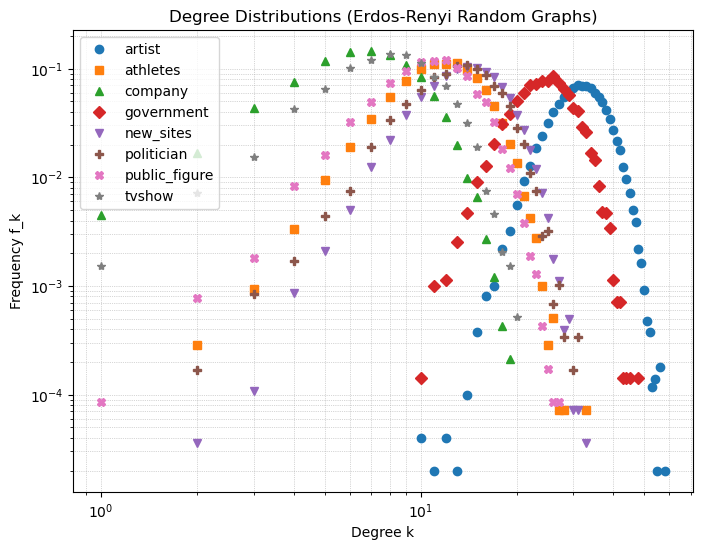

Estimated power-law exponents for ER graphs:


,network,alpha,intercept
0,artist,-0.044241,-3.016761
1,athletes,-0.025502,-2.594154
2,company,-0.039890,-2.394076
3,government,-0.217157,-2.366472
4,new_sites,-0.281621,-1.981836
5,politician,0.027545,-2.800845
6,public_figure,0.109877,-2.921061
7,tvshow,-0.157088,-2.227347


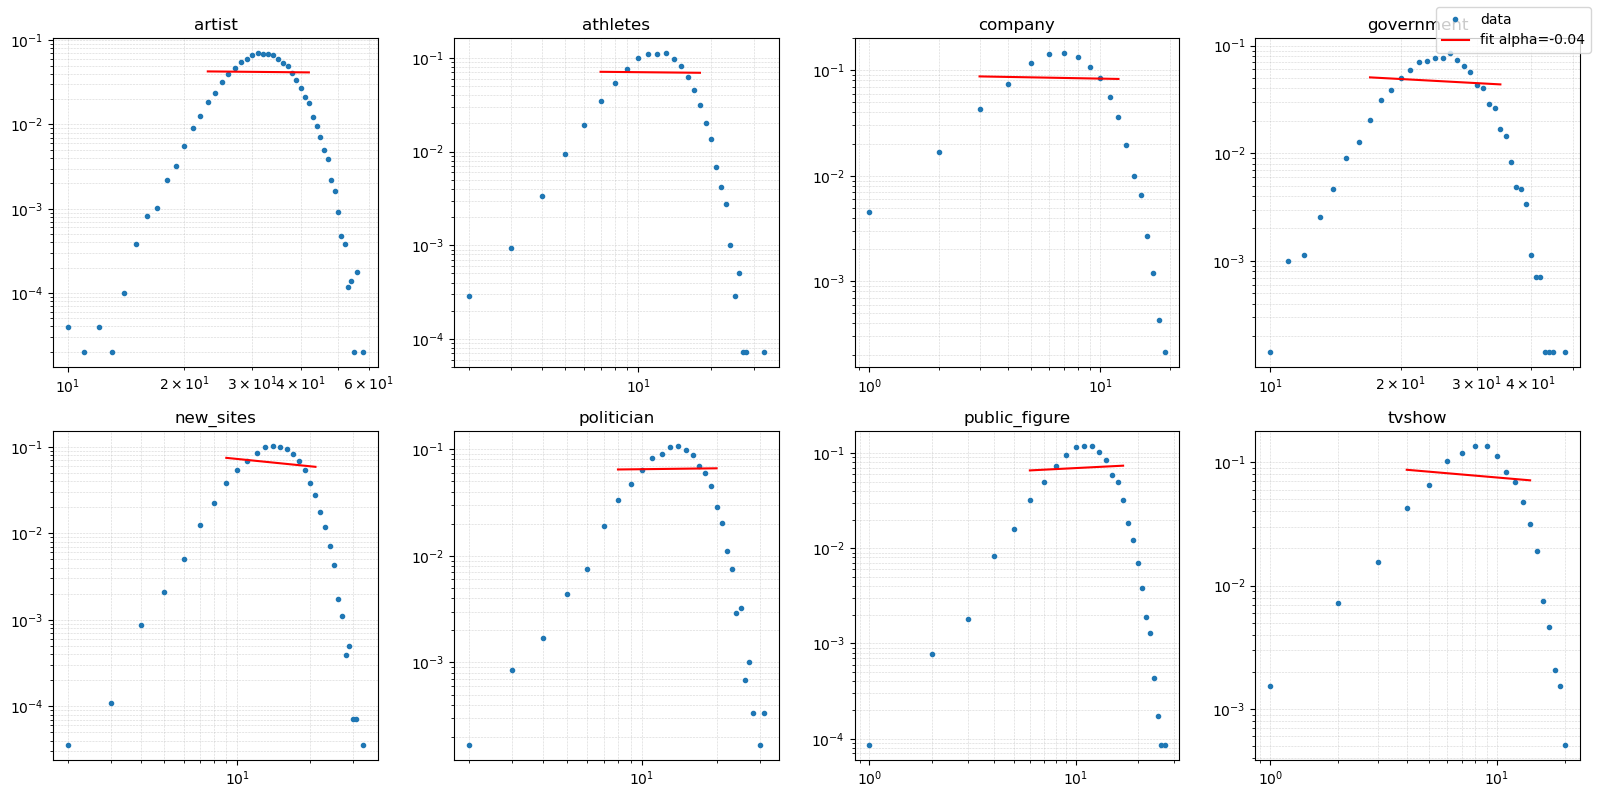


Comparing the degree distributions shows that the Erdos-Renyi model fails to reproduce the scale-free properties of the real networks. ER graphs yield a tightly concentrated, Poisson-like distribution with no heavy tail, unlike the real Facebook networks which display broad degree ranges with prominent hub nodes. ER is therefore not a suitable generative model here.


In [6]:
# Qu3: Simulation code for the Erdos-Renyi model

er_results = {}
for name, G in networks.items():
    n = G.number_of_nodes()
    m = G.number_of_edges()
    p = (2 * m) / (n * (n - 1))
    G_er = nx.erdos_renyi_graph(n, p, seed=42)
    er_results[name] = G_er

# Code for Computing and plotting the degree distribution and fitted power-law exponent for the random graphs:

# Combined plot (all ER networks together, similar to Qu2)
plt.figure(figsize=(8, 6))
for (name, G_er), marker in zip(er_results.items(), ["o", "s", "^", "D", "v", "P", "X", "*"]):
    degrees, k, freq = degree_distribution(G_er)
    plt.loglog(k, freq, marker=marker, linestyle="", label=name)

plt.xlabel("Degree k")
plt.ylabel("Frequency f_k")
plt.title("Degree Distributions (Erdos-Renyi Random Graphs)")
plt.legend()
plt.grid(True, which="both", linestyle=":", linewidth=0.5)
plt.show()

# Fitted power-law exponents for ER graphs
er_fit_rows = []
er_fit_store = {}
for name, G_er in er_results.items():
    degrees, k, freq = degree_distribution(G_er)
    alpha, intercept, k_fit, f_fit = fit_powerlaw(degrees, k, freq)
    er_fit_rows.append({"network": name, "alpha": alpha, "intercept": intercept})
    er_fit_store[name] = (k, freq, alpha, intercept, k_fit)

print("Estimated power-law exponents for ER graphs:")
display(pd.DataFrame(er_fit_rows).sort_values("network").reset_index(drop=True))

# Plot distributions with fitted power-law lines (per ER network)
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=False, sharey=False)
axes = axes.ravel()
for ax, (name, G_er) in zip(axes, er_results.items()):
    k, freq, alpha, intercept, k_fit = er_fit_store[name]
    ax.loglog(k, freq, "o", markersize=3, label="data")
    if np.isfinite(alpha):
        k_line = np.linspace(k_fit.min(), k_fit.max(), 80)
        f_line = np.exp(intercept) * (k_line ** alpha)
        ax.loglog(k_line, f_line, "r-", label=f"fit alpha={alpha:.2f}")
    ax.set_title(name)
    ax.grid(True, which="both", linestyle=":", linewidth=0.4)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.tight_layout()
plt.show()

print("\nComparing the degree distributions shows that the Erdos-Renyi model fails to reproduce the "
      "scale-free properties of the real networks. ER graphs yield a tightly concentrated, Poisson-like "
      "distribution with no heavy tail, unlike the real Facebook networks which display broad degree "
      "ranges with prominent hub nodes. ER is therefore not a suitable generative model here.")

## Qu3 – Explanation

  Is the Erdos-Renyi model a good generative model? No.
  In an ER graph $G(n,p)$, edges are placed independently, so node degrees follow a Binomial$(n-1, p)$ distribution — well approximated by a Poisson in the sparse
   regime. This produces a distribution tightly concentrated around the mean, with virtually no nodes deviating far from the average degree.

  Does it give a power-law distribution? No.
  On the log–log scale, ER degree distributions appear as a narrow, fast-decaying cluster — not the broad straight-line tail seen in the real networks. The fitted
   $\alpha$ values are therefore not meaningful as power-law exponents.

  The ER model matches the number of edges by construction, but completely fails to reproduce the hub structure of the real Facebook networks. A
  preferential-attachment model (e.g. Barabasi–Albert) would be far more appropriate.


#### Qu4: Unix commands for uniting the networks and adding random edges:

We use `awk` to offset node IDs in each sub-network file, concatenate all edge lists into a single file, and then generate random inter-community edges using `$RANDOM`.

```bash
# 1) Extract (if not already done)
tar -xf gemsec_facebook_dataset.tar.gz

# 2) Build combined edge list with disjoint node IDs
offset=0
> combined_edges.csv

for f in facebook_clean_data/*_edges.csv; do
  # number of nodes in this file (max node id + 1)
  n=$(awk -F, 'NR>1{if($1>m)m=$1; if($2>m)m=$2} END{print m+1}' "$f")
  echo "Processed $f: n=$n, offset was $offset"

  # append edges with offset; canonicalize u<v for undirected uniqueness
  awk -F, -v OFS=',' -v off=$offset 'NR>1{u=$1+off; v=$2+off; if(u<v) print u,v; else print v,u}' "$f" \
    >> combined_edges.csv

  offset=$((offset + n))
done

# remove duplicates
sort -t, -k1,1n -k2,2n -u combined_edges.csv > combined_edges_unique.csv
mv combined_edges_unique.csv combined_edges.csv

# 3) Add ~10% random edges using $RANDOM
# Bash $RANDOM only covers 0-32767; combining two calls with bit-shift
# covers the full node ID range (0 to n-1)
n=$offset
m=$(wc -l < combined_edges.csv)
add=$((m/10))
echo ""
echo "Edges before random additions: $m"
echo "Adding approximately $add random edges..."

for i in $(seq 1 $add); do
  u=$(( (RANDOM << 15 | RANDOM) % n ))
  v=$(( (RANDOM << 15 | RANDOM) % n ))
  if [ $u -ne $v ]; then
    if [ $u -lt $v ]; then echo "$u,$v"; else echo "$v,$u"; fi
  fi
done >> combined_edges.csv

# de-duplicate again after random additions
sort -t, -k1,1n -k2,2n -u combined_edges.csv > combined_edges_unique.csv
mv combined_edges_unique.csv combined_edges.csv

# report counts
nodes=$n
edges=$(wc -l < combined_edges.csv)
echo ""
echo "Combined network: nodes=$nodes, edges=$edges"
```

#### Output (from running the above commands in my terminal):
```
Processed facebook_clean_data/artist_edges.csv: n=50515, offset was 0
Processed facebook_clean_data/athletes_edges.csv: n=13866, offset was 50515
Processed facebook_clean_data/company_edges.csv: n=14113, offset was 64381
Processed facebook_clean_data/government_edges.csv: n=7057, offset was 78494
Processed facebook_clean_data/new_sites_edges.csv: n=27917, offset was 85551
Processed facebook_clean_data/politician_edges.csv: n=5908, offset was 113468
Processed facebook_clean_data/public_figure_edges.csv: n=11565, offset was 119376
Processed facebook_clean_data/tvshow_edges.csv: n=3892, offset was 130941

Edges before random additions: 1380293
Adding approximately 138029 random edges...

Combined network: nodes=134833, edges=1518322
```

**Qu4 – explanation**

Each of the eight edge-list files uses node IDs starting from zero. To create a single graph, we apply a running offset so that every sub-network gets a disjoint range of IDs. Within the `for` loop, `awk` computes the maximum node ID to determine the sub-network size, and a second `awk` call shifts all IDs and writes edges in canonical `(min, max)` order. After concatenation, `sort -u` eliminates any duplicate edges.

For the random edges, bash's built-in `$RANDOM` variable only generates integers in $0\text{--}32767$. Since the combined graph contains $134{,}833$ nodes, we combine two `$RANDOM` calls via bit-shifting (`(RANDOM<<15|RANDOM) % n`) to produce uniformly distributed values over the full node range. Self-loops ($u = v$) are skipped, and a final deduplication pass ensures no parallel edges.

In [7]:
# Qu5:
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community import asyn_lpa_communities
from sklearn.metrics import adjusted_rand_score

# Build a unified network with disjoint node labels and add 0.1m random edges
names = sorted(networks.keys())

combined_graph = nx.Graph()
gt_communities = []
gt_labels = {}

next_id = 0
for idx, name in enumerate(names):
    G = networks[name]
    mapping = {node: (next_id + i) for i, node in enumerate(G.nodes())}
    next_id += len(mapping)
    H = nx.relabel_nodes(G, mapping, copy=True)
    combined_graph = nx.compose(combined_graph, H)
    gt_communities.append(set(H.nodes()))
    for node in H.nodes():
        gt_labels[node] = idx

n = combined_graph.number_of_nodes()
m = combined_graph.number_of_edges()

rng = np.random.default_rng(42)
add_edges = int(round(0.1 * m))
added = 0
while added < add_edges:
    u = int(rng.integers(0, n))
    v = int(rng.integers(0, n))
    if u == v or combined_graph.has_edge(u, v):
        continue
    combined_graph.add_edge(u, v)
    added += 1

print(f"Unified network: n={n}, m(before)={m}, added={added}, m(after)={combined_graph.number_of_edges()}")

# Save combined edges for reference
pd.DataFrame(list(combined_graph.edges()), columns=["node_1", "node_2"]).to_csv(
    "combined_edges_with_random.csv", index=False
)

# Compute modularity for the ground-truth communities
mod_gt = modularity(combined_graph, gt_communities)
print(f"Ground-truth modularity (8 communities): {mod_gt:.4f}")

# Run community detection and compute modularity
lpa_comms = list(asyn_lpa_communities(combined_graph, seed=42))
mod_lpa = modularity(combined_graph, lpa_comms)
print(f"LPA communities: {len(lpa_comms)} communities, modularity={mod_lpa:.4f}")

# Compute and report the ARI between the two
nodes_sorted = sorted(combined_graph.nodes())
true_labels = [gt_labels[n] for n in nodes_sorted]

pred_labels = {}
for i, comm in enumerate(lpa_comms):
    for node in comm:
        pred_labels[node] = i
pred_labels = [pred_labels[n] for n in nodes_sorted]

ari = adjusted_rand_score(true_labels, pred_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Unified network: n=134833, m(before)=1380293, added=138029, m(after)=1518322
Ground-truth modularity (8 communities): 0.5614
LPA communities: 3631 communities, modularity=0.6064
Adjusted Rand Index (ARI): 0.5510


**Qu5 – Explanation**

We obtain a ground-truth modularity of **0.5614** for the eight original page-category communities. This relatively high value reflects the fact that most edges stay within a single category, despite the 10% random edges added between communities.

Running `asyn_lpa_communities` yields **3,631 communities** with modularity **0.6064**. The algorithm finds many more communities than the 8 ground-truth groups because label propagation detects sub-communities within each category. The slightly higher modularity compared to the ground truth indicates that these smaller clusters are internally denser than the coarse 8-way split.

The **ARI of 0.5510** shows a reasonably strong correspondence between the detected and true partitions. Since ARI equals 1 for perfect agreement and approximately 0 for random labelling, this value suggests that most algorithmically detected micro-communities are contained within a single ground-truth category. The score is not closer to 1 primarily because the algorithm fragments each true community into many small pieces, and the random inter-community edges occasionally cause nodes near category boundaries to be assigned to the wrong cluster.

Completed 10/100
Completed 20/100
Completed 30/100
Completed 40/100
Completed 50/100
Completed 60/100
Completed 70/100
Completed 80/100
Completed 90/100
Completed 100/100


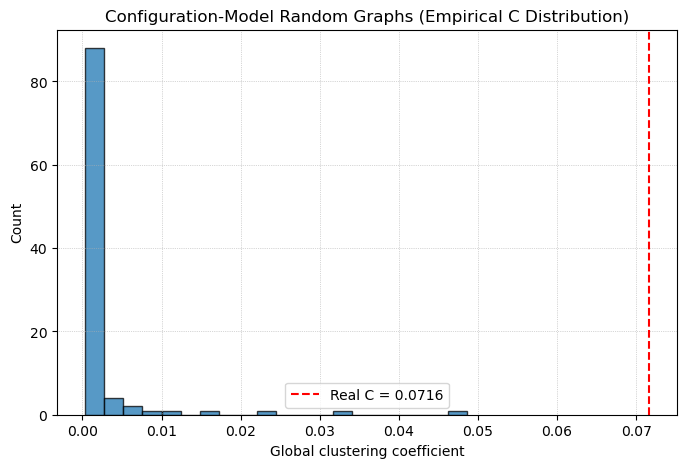

Real network clustering coefficient: 0.0716
Randomized networks: mean=0.0025, std=0.0064
The real C is far above the randomized mean, so the configuration model underestimates clustering and is not a good generative model for this network based on clustering coefficient.


In [8]:
# Qu6:  Loop and generate 100 random networks, and compute the clustering coefficient for each one:
import random
import copy

def sample_random_graph_with_degree_seq(G, iters = 100000):
    G_rand = G # Note! we don't do deep copy here to save time. But the function can modify G. It is better to keep a separate copy of G outside the function
    edges = random.sample(list(G_rand.edges()), 2*iters)

    for i in range(0, iters, 2):
#        if i%1000 == 0:
#            print("Run: ", i)  # you can turn off/on internal printing
        if edges[i] in G_rand.edges() and edges[i+1] in G_rand.edges() and len(set(edges[i] + edges[i+1])) == 4: # swap
            G_rand.remove_edges_from([edges[i], edges[i+1]])
            G_rand.add_edges_from([ (edges[i][0], edges[i+1][1]), (edges[i][1], edges[i+1][0])  ])

    return G_rand

# Simulate random networks and compute the clustering coefficients
real_cc = nx.transitivity(combined_graph)

clustering_vals = []
G_rand = combined_graph.copy()
for i in range(100):
    G_rand = sample_random_graph_with_degree_seq(G_rand, iters=200000)
    cc = nx.transitivity(G_rand)
    clustering_vals.append(cc)
    if (i + 1) % 10 == 0:
        print(f"Completed {i + 1}/100")

# Display the empirical distribution and compare to the clustering coefficient of the real network
plt.figure(figsize=(8, 5))
plt.hist(clustering_vals, bins=20, alpha=0.75, edgecolor="black")
plt.axvline(real_cc, color="red", linestyle="--", label=f"Real C = {real_cc:.4f}")
plt.xlabel("Global clustering coefficient")
plt.ylabel("Count")
plt.title("Configuration-Model Random Graphs (Empirical C Distribution)")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.5)
plt.show()

print(f"Real network clustering coefficient: {real_cc:.4f}")
print(f"Randomized networks: mean={np.mean(clustering_vals):.4f}, std={np.std(clustering_vals):.4f}")
print("The real C is far above the randomized mean, so the configuration model underestimates clustering "
      "and is not a good generative model for this network based on clustering coefficient.")

**Qu6 – Explanation**

The distribution of clustering coefficients obtained from 100 degree-preserving randomized graphs is concentrated well below the real network's global clustering coefficient (marked by the red dashed line in the plot).

This demonstrates that the degree sequence by itself does not account for the high level of transitivity present in the real Facebook network. In social networks, the tendency for "friends of friends" to also be friends (triadic closure) produces many more triangles than expected by chance alone. The configuration model randomizes which specific pairs of nodes are connected while keeping each node's degree unchanged, effectively eliminating the local clustering structure.

**Conclusion:** The configuration model fails to capture the clustering coefficient of the real network and is therefore **not a good generative model** for this property. Accurately reproducing clustering would require a model that explicitly promotes triangle formation, for example through community structure or triadic closure mechanisms.